Epoch 1/20
600/600 [==============================] - 11s 17ms/step - loss: 0.3834 - accuracy: 0.8935 - val_loss: 0.1239 - val_accuracy: 0.9610
Epoch 2/20
600/600 [==============================] - 9s 16ms/step - loss: 0.0913 - accuracy: 0.9725 - val_loss: 0.0805 - val_accuracy: 0.9762
Epoch 3/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0516 - accuracy: 0.9846 - val_loss: 0.0692 - val_accuracy: 0.9785
Epoch 4/20
600/600 [==============================] - 9s 16ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0711 - val_accuracy: 0.9772
Epoch 5/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0629 - val_accuracy: 0.9800
Epoch 6/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0674 - val_accuracy: 0.9799
Epoch 7/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.0655 - val_accuracy: 0.980

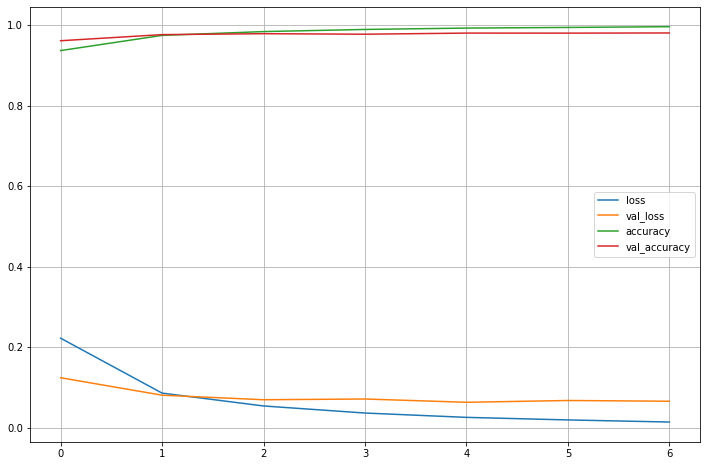

313/313 [==============================] - 2s 6ms/step - loss: 0.0655 - accuracy: 0.9803
Test loss :  0.06553475558757782
Test Accuracy :  0.9803000092506409
/model_weights/dense_6/dense_6/bias:0
/model_weights/dense_6/dense_6/kernel:0
/model_weights/dense_7/dense_7/bias:0
/model_weights/dense_7/dense_7/kernel:0
/optimizer_weights/Adam/dense_6/bias/m:0
/optimizer_weights/Adam/dense_6/bias/v:0
/optimizer_weights/Adam/dense_6/kernel/m:0
/optimizer_weights/Adam/dense_6/kernel/v:0
/optimizer_weights/Adam/dense_7/bias/m:0
/optimizer_weights/Adam/dense_7/bias/v:0
/optimizer_weights/Adam/dense_7/kernel/m:0
/optimizer_weights/Adam/dense_7/kernel/v:0
/optimizer_weights/Adam/iter:0
{'/model_weights/dense_6/dense_6/bias:0': array([ 1.40712271e-02,  1.39945755e-02,  1.46437874e-02,  1.80333555e-02,
        1.07904738e-02,  8.63355864e-03,  7.57166697e-03,  1.25218183e-03,
        4.56543826e-02,  9.91173927e-03,  1.36480024e-02, -3.45330290e-03,
       -1.03217503e-02, -1.40677756e-02, -1.03218323

<ipython-input-7-fa452f178d1b>:60: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  w_dict[file[key].name] = file[key].value


In [7]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping

# EarlyStopping : 오버피팅 시 학습 멈추기 ( 조건 : )
# ModelCheckpoint : 이전 에폭과 비교해 현재 에폭의 점수가 좋으면 모델을 저장하는 기능 
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# 모델 저장 폴더
import os
if not os.path.exists("./model"):
    os.mkdir('./model')
filepath = "./model/{epoch:02d}{val_loss:.3f}.h5"

checkpnt = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True)
estop = EarlyStopping(monitor='val_loss',patience=2)
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    callbacks = [checkpnt,estop],
                 epochs=20, batch_size=100, verbose=1)

import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()


score = model.evaluate(x_test, y_test)
print('Test loss : ', score[0])
print('Test Accuracy : ', score[1])

import h5py
filepath = "./model/010.109.h5"

w_dict = {}
# file = h5py.File(filepath, 'r')
# file.close()
key_list = []
with h5py.File(filepath, 'r') as file:
    file.visit(key_list.append)

    for key in key_list:
        if ':' in key :  # {node : weight}
            print(file[key].name)
            w_dict[file[key].name] = file[key].value

print(w_dict)

# load_model = load_model('./model/boston_.h5')
# pred = load_model.predict(X_test).flatten()

# print(pred[:5])
# print(y_test[:5])

# eval = load_model.evaluate(X_test,y_test)
# print("")

#-------------------------------------------------------
#
# wrong_result = []
# for n in range(0, len(y_test)):
#     if predicted_labels[n] != y_test[n]:
#         wrong_result.append(n)
# len(wrong_result)
#
# plt.figure(figsize=(14, 12))
#
# for idx, n in enumerate(wrong_result[:16]):
#     plt.subplot(4, 4, idx + 1)
#     plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
#     plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
#     plt.axis('off')
#
# plt.show()
